# Latin Hypercube Sampling using UQpy

Author: Dimitris G. Giovanis,  
Date: May 13, 2020  
UQpy Version 3.0

In [1]:
#Import the necessary libraries. Here we import standard libraries such as numpy and matplotlib, 
# but also need to import the LHS class from UQpy.
from UQpy.SampleMethods import LHS
import numpy as np
import matplotlib.pyplot as plt
import time

UQpy: Running Latin Hypercube sampling...
UQpy: Achieved minimum correlation of  0.002919697080706942
Successful execution of LHS design.


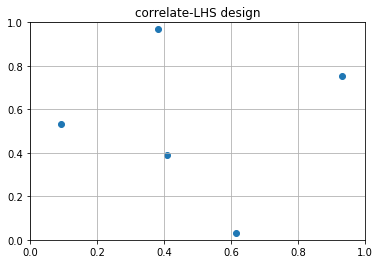

UQpy: Running Latin Hypercube sampling...
UQpy: Achieved maximum distance of  0.4009232630707675
Successful execution of LHS design.


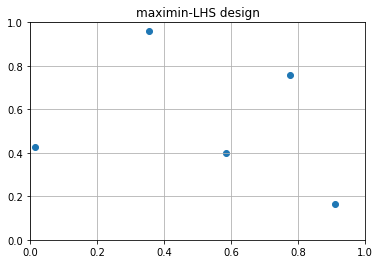

UQpy: Running Latin Hypercube sampling...
Successful execution of LHS design.


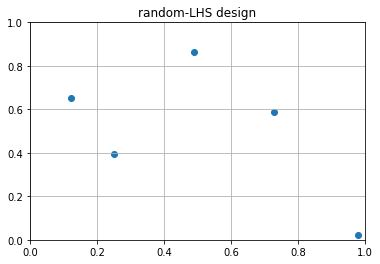

UQpy: Running Latin Hypercube sampling...
Successful execution of LHS design.


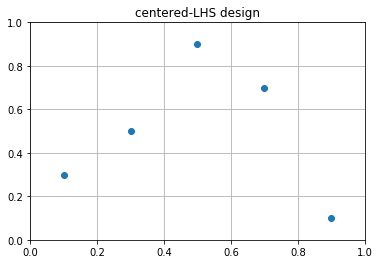

In [2]:
# Import the necessary Distributions from Distribution class to create the Distribution object
# We are going to run LHS for two uniform U(0,1) random variables.
from UQpy.Distributions import Uniform
dist1 = Uniform(loc=0., scale=1.)
dist2 = Uniform(loc=0., scale=1.)

x1a = LHS(dist_object=[dist1, dist2], criterion='correlate', nsamples=5, verbose=True)

fig, ax = plt.subplots()
plt.title('correlate-LHS design')
plt.scatter(x1a.samples[:, 0], x1a.samples[:, 1])
ax.set_yticks([0.0, 0.2, 0.4, 0.6, 0.8, 1.0])
ax.set_xticks([0.0, 0.2, 0.4, 0.6, 0.8, 1.0])
ax.yaxis.grid(True)
ax.xaxis.grid(True)
plt.ylim(0, 1)
plt.xlim(0, 1)
plt.show()


x1b = LHS(dist_object=[dist1, dist2], criterion='maximin', nsamples=5, verbose=True)


fig, ax = plt.subplots()
plt.title('maximin-LHS design')
plt.scatter(x1b.samples[:, 0], x1b.samples[:, 1])
ax.set_yticks([0.0, 0.2, 0.4, 0.6, 0.8, 1.0])
ax.set_xticks([0.0, 0.2, 0.4, 0.6, 0.8, 1.0])
ax.yaxis.grid(True)
ax.xaxis.grid(True)
plt.ylim(0, 1)
plt.xlim(0, 1)
plt.show()

x1c = LHS(dist_object=[dist1, dist2], nsamples=5, verbose=True)

fig, ax = plt.subplots()
plt.title('random-LHS design')
plt.scatter(x1c.samples[:, 0], x1c.samples[:, 1])
ax.set_yticks([0.0, 0.2, 0.4, 0.6, 0.8, 1.0])
ax.set_xticks([0.0, 0.2, 0.4, 0.6, 0.8, 1.0])
ax.yaxis.grid(True)
ax.xaxis.grid(True)
plt.ylim(0, 1)
plt.xlim(0, 1)
plt.show()


x1d = LHS(dist_object=[dist1, dist2], criterion='centered', nsamples=5, verbose=True)


fig, ax = plt.subplots()
plt.title('centered-LHS design')
plt.scatter(x1d.samples[:, 0], x1d.samples[:, 1])
ax.set_yticks([0.0, 0.2, 0.4, 0.6, 0.8, 1.0])
ax.set_xticks([0.0, 0.2, 0.4, 0.6, 0.8, 1.0])
ax.yaxis.grid(True)
ax.xaxis.grid(True)
plt.ylim(0, 1)
plt.xlim(0, 1)
plt.show()

In [3]:
from UQpy.Distributions import Uniform, Normal
dist1 = Normal(loc=0., scale=1.)
dist2 = Uniform(loc=0., scale=1.)

x2a = LHS(dist_object=[dist1, dist2], criterion='random', nsamples=5, verbose=True)
print('LHS design:', x2a.samples)


x2a.transform_u01()
print('Transformed samples:', x2a.samplesU01)

UQpy: Running Latin Hypercube sampling...
Successful execution of LHS design.
LHS design: [[ 0.71872278  0.90734542]
 [-0.03816337  0.58403999]
 [-1.53583178  0.35819304]
 [ 1.43225923  0.19841023]
 [-0.50989763  0.70713347]]
Transformed samples: [[0.76384413 0.71872278]
 [0.48477871 0.        ]
 [0.06228982 0.        ]
 [0.92396518 1.        ]
 [0.30506159 0.        ]]


In [4]:
# Run LHS for a user-defined criterion and metric
def distance(x):
    return x + 1

def criterion():
    samples_in_U_ab = np.atleast_2d(np.array([1., 1.]))
    return samples_in_U_ab

dist1 = Uniform(loc=0., scale=1.)
dist2 = Uniform(loc=0., scale=1.)
x1e = LHS(dist_object=[dist1, dist2], nsamples=5, criterion=criterion, metric=distance, verbose=True)
print(x1e.samples)

UQpy: Running Latin Hypercube sampling...
Successful execution of LHS design.
[[1. 1.]
 [1. 1.]
 [1. 1.]
 [1. 1.]
 [1. 1.]]


In [5]:
# We are going to run LHS for a Joint distribution.
from UQpy.Distributions import Normal, Lognormal, JointInd
marginals = [Normal(loc=2., scale=2.), Lognormal(s=1., loc=0., scale=np.exp(5))]
dist = JointInd(marginals=marginals)

x2 = LHS(dist_object=dist, nsamples=5, criterion='maximin', verbose=True)
x2.transform_u01()
print(x2.samples)
print(x2.samplesU01)

UQpy: Running Latin Hypercube sampling...
UQpy: Achieved maximum distance of  0.44382168833913405
Successful execution of LHS design.
[[ 5.72764308e+00  1.81018163e+02]
 [-1.54137907e+00  8.13375394e+01]
 [ 2.32135104e+00  8.66184169e+00]
 [ 3.64429983e+00  1.36948556e+03]
 [ 3.24926215e-01  2.45764215e+02]]
[[0.96882662 0.57871115]
 [0.03830617 0.27378935]
 [0.56382552 0.0022481 ]
 [0.79450421 0.98686478]
 [0.20114542 0.69300022]]
